In [1]:
import os 
import folium
import json
import rasterio
from rasterio.warp import transform_bounds
import geopandas as gpd

In [2]:
def read_json(filename: str) -> dict:
    with open(filename) as input:
        field = json.load(input)
    return field
aoi = read_json("aoi/aoi.geojson")
ndvi_diff = rasterio.open("Result/NDVIDiff.tiff")
inventory_val = gpd.read_file("Inventory/landslide_inventory.gpkg")


In [3]:
bounds = transform_bounds(ndvi_diff.crs,'EPSG:4326',*ndvi_diff.bounds)


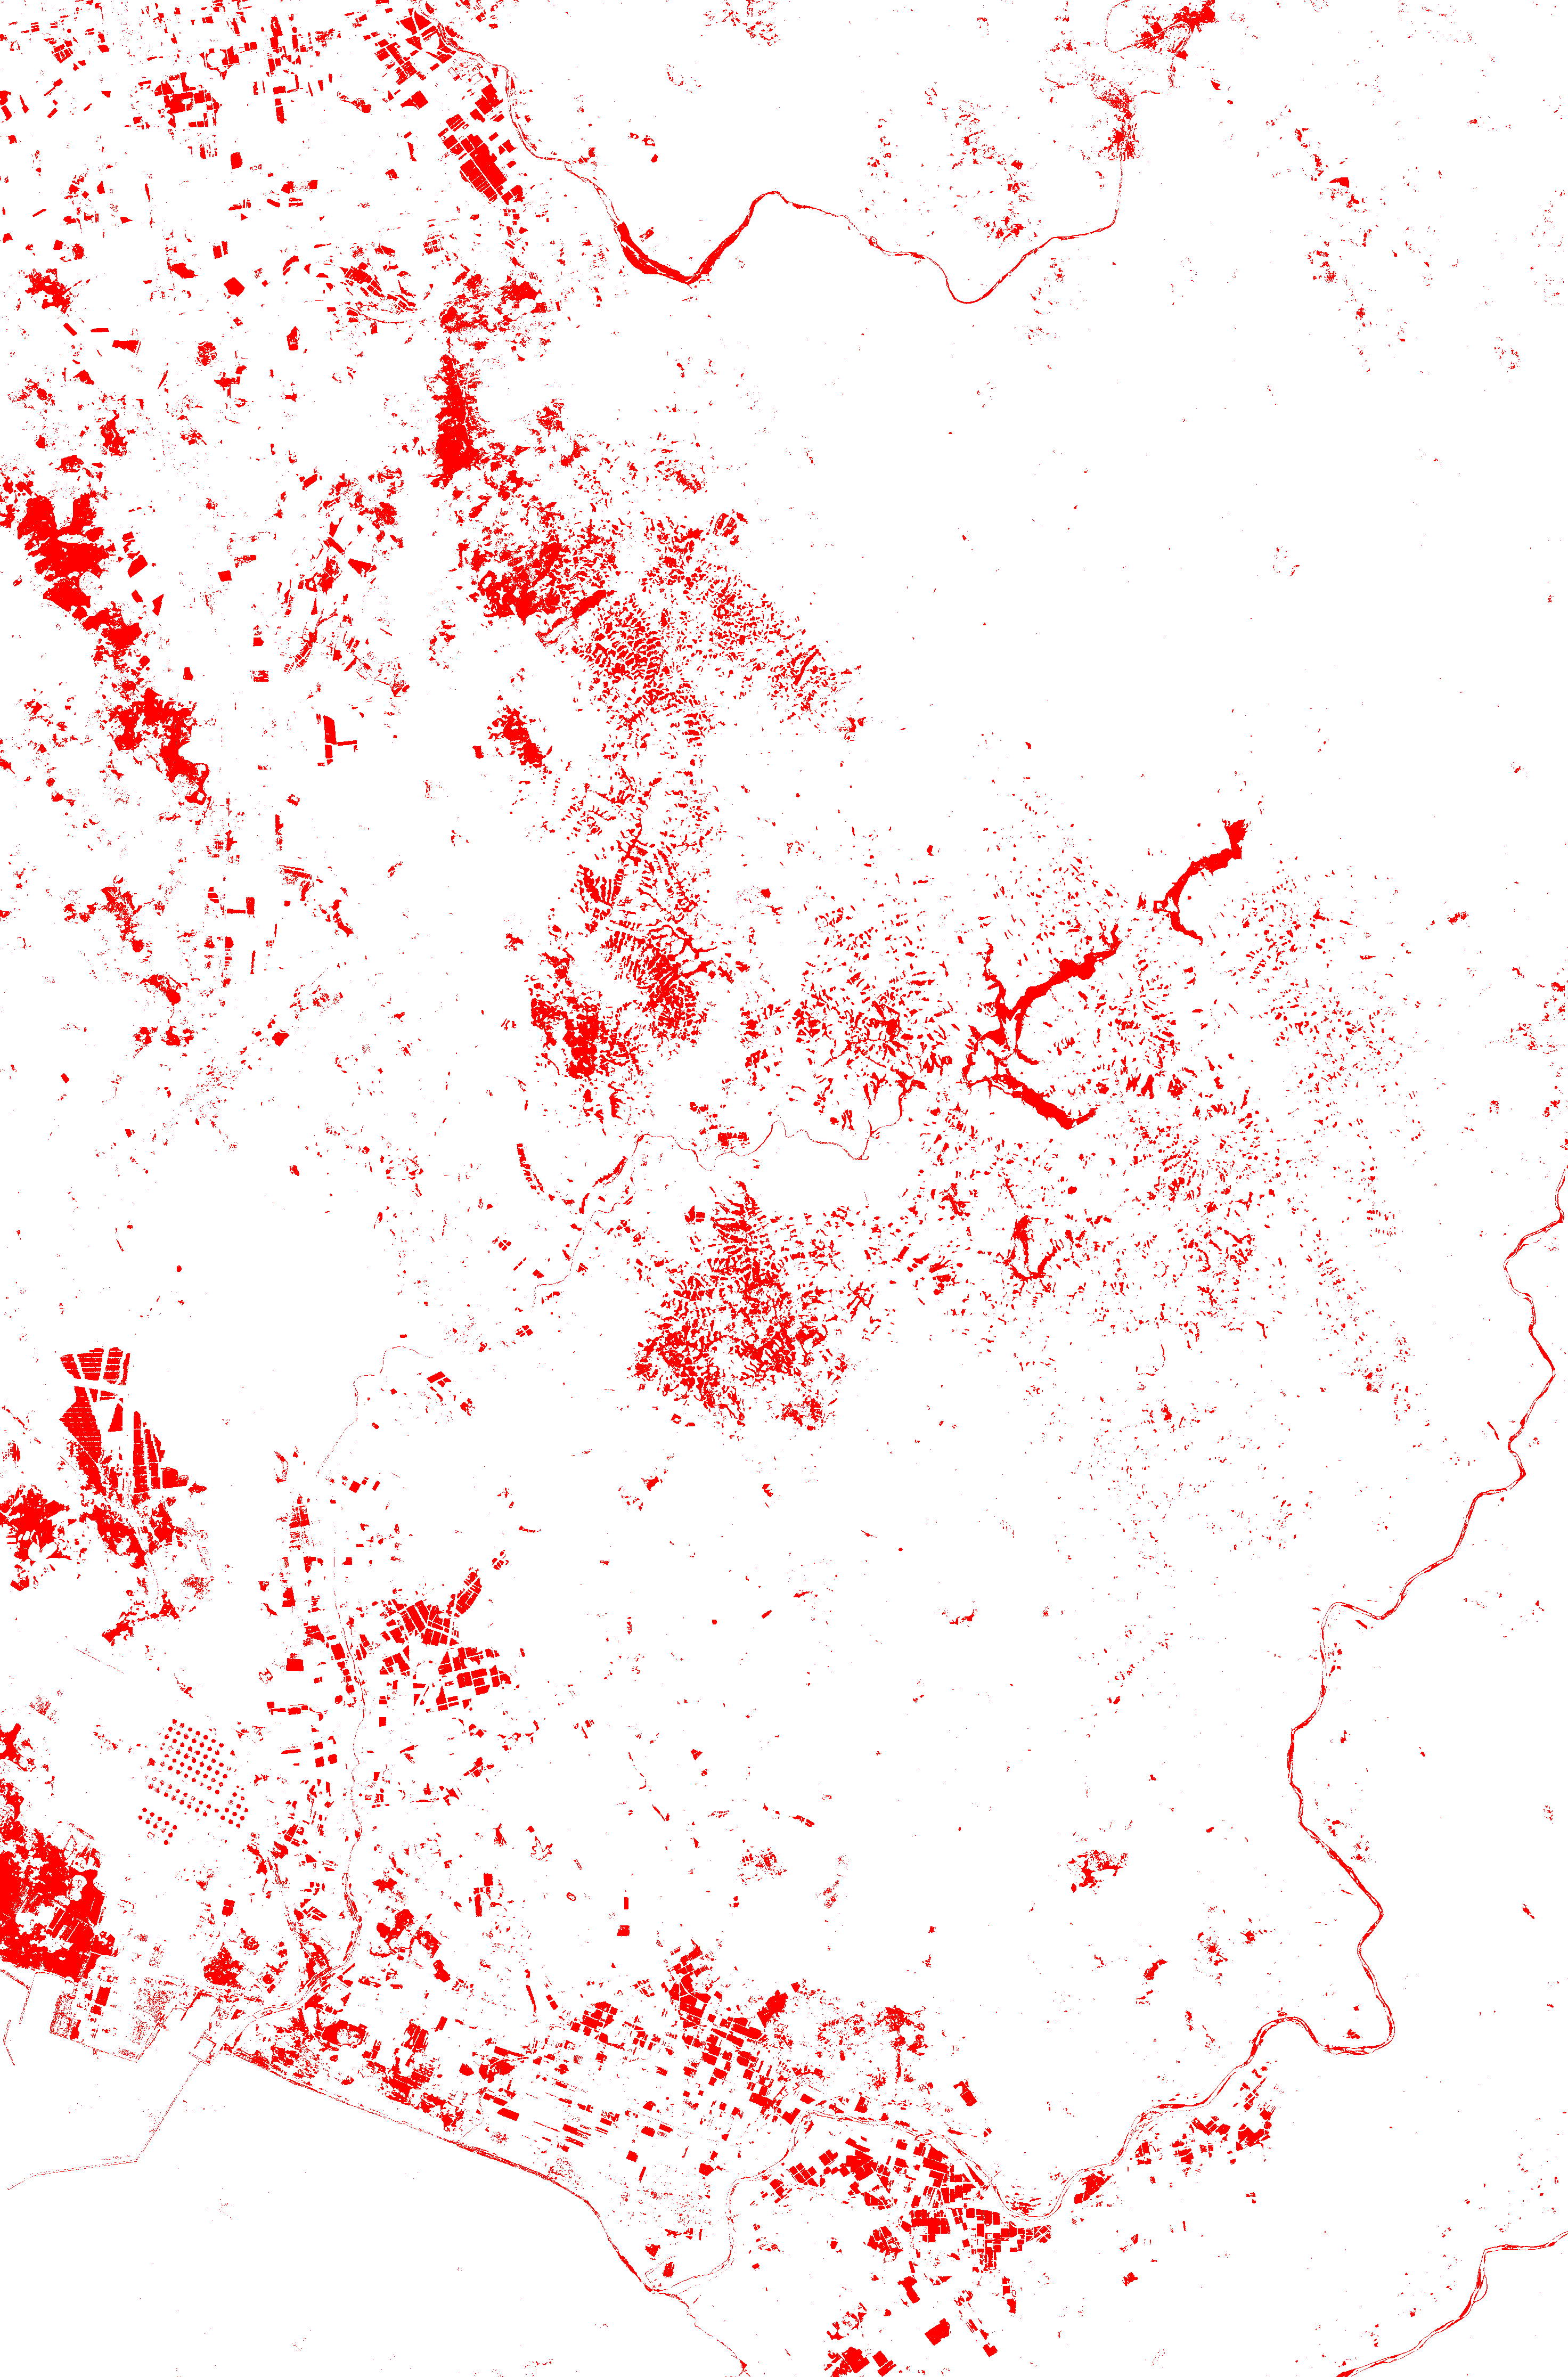

In [ ]:
threshold = 0.25

m = folium.Map([42.75, 141.96], zoom_start=11)
folium.GeoJson(aoi).add_to(m)

tile = folium.TileLayer(
      tiles = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
      attr = 'Esri',
      name = 'Esri Satellite',
      overlay = False,
      control = True
      ).add_to(m)

folium.GeoJson(
    inventory_val.to_crs(epsg=4326).to_json(),
    name="Vector Overlay",
    style_function=lambda feature: {
        'fillColor': '#blue',
        'color': 'green',
        'weight': 2,
        'fillOpacity': 0.5,
    }
).add_to(m)

folium.raster_layers.ImageOverlay(
    image=ndvi_diff.read(1)>threshold,
    bounds=[[bounds[1]-0.0002,bounds[0]],[bounds[3],bounds[2]]],
#     origin="lower",
    colormap=lambda x: (1, 0, 0, x),
#     mercator_project=True
).add_to(m)



folium.LayerControl().add_to(m)
m

In [11]:
[[bounds[0],bounds[1]],[bounds[2],bounds[3]]]

[[563150.0, 4710980.0], [592590.0, 4755610.0]]